In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [ ]:
with open("/Users/sagar/Documents/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/Users/sagar/Documents/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/Users/sagar/Documents/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
x_train,y_train=train['features'],train['labels']
x_validation,y_validation=valid['features'],valid['labels']
x_test,y_test=test['features'],test['labels']

In [ ]:
x_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

38

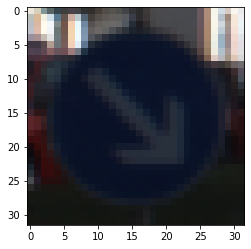

In [ ]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

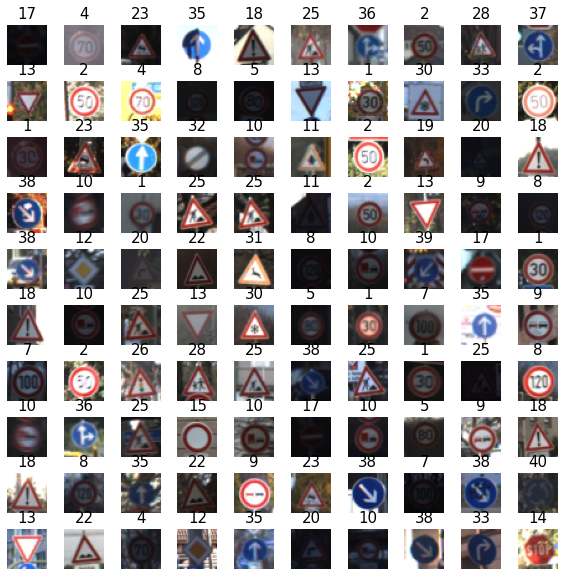

In [ ]:
W_grid=10
L_grid=10
fig,axes=plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,W_grid*L_grid):
    j=np.random.randint(0,n_training)
    axes[i].imshow(x_train[j])
    axes[i].set_title(y_train[j],fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
x_train_gray=np.sum(x_train/3, axis = 3 , keepdims=True)
x_test_gray=np.sum(x_test/3, axis = 3 , keepdims=True)
x_validation_gray=np.sum(x_validation/3, axis = 3 , keepdims=True)


In [ ]:
x_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
x_train_gray_norm= (x_train_gray-128)/128
x_test_gray_norm=(x_test_gray-128)/128
x_validation_gray_norm= (x_validation_gray-128)/128

In [ ]:
x_train_gray_norm

array([[[[ 0.7421875 ],
         [ 0.80208333],
         [ 0.9453125 ],
         ...,
         [ 0.08333333],
         [ 0.1875    ],
         [ 0.2265625 ]],

        [[ 0.6015625 ],
         [ 0.64322917],
         [ 0.56510417],
         ...,
         [ 0.19270833],
         [ 0.296875  ],
         [ 0.30989583]],

        [[ 0.26041667],
         [ 0.11979167],
         [-0.07552083],
         ...,
         [ 0.2578125 ],
         [ 0.35677083],
         [ 0.34635417]],

        ...,

        [[-0.19010417],
         [ 0.05729167],
         [ 0.2109375 ],
         ...,
         [ 0.546875  ],
         [ 0.984375  ],
         [ 0.9921875 ]],

        [[-0.2109375 ],
         [ 0.046875  ],
         [ 0.33072917],
         ...,
         [ 0.55729167],
         [ 0.984375  ],
         [ 0.9921875 ]],

        [[-0.25260417],
         [ 0.03385417],
         [ 0.40364583],
         ...,
         [ 0.57291667],
         [ 0.98697917],
         [ 0.9921875 ]]],


       [[[-0.54166667],


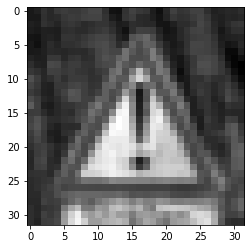

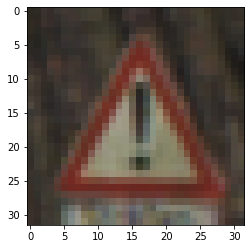

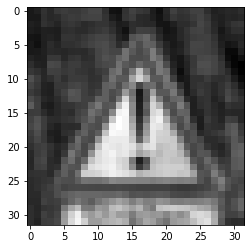

In [ ]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

In [ ]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()
cnn.add(layers.Conv2D(6,(5,5), activation='relu', input_shape=(32,32,1)))
cnn.add(layers.AveragePooling2D())

cnn.add(layers.Dropout(0.2))
cnn.add(layers.Conv2D(16,(5,5), activation='relu', ))
cnn.add(layers.AveragePooling2D())


cnn.add(layers.Flatten())


cnn.add(layers.Dense(120,activation='relu'))
cnn.add(layers.Dense(84,activation='relu'))
cnn.add(layers.Dense(43,activation='softmax'))
cnn.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [ ]:
cnn.compile(optimizer = 'Adam' , loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = cnn.fit(x_train_gray_norm,
                 y_train,
                 batch_size= 500,
                 epochs=50,
                 verbose=1,
                 validation_data=(x_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 6s 81ms/step - loss: 3.1361 - accuracy: 0.1859 - val_loss: 2.5883 - val_accuracy: 0.3175
Epoch 2/50
70/70 [==============================] - 6s 82ms/step - loss: 1.7727 - accuracy: 0.5005 - val_loss: 1.4709 - val_accuracy: 0.5744
Epoch 3/50
70/70 [==============================] - 6s 79ms/step - loss: 1.1386 - accuracy: 0.6659 - val_loss: 1.0462 - val_accuracy: 0.6832
Epoch 4/50
70/70 [==============================] - 6s 79ms/step - loss: 0.8452 - accuracy: 0.7524 - val_loss: 0.8547 - val_accuracy: 0.7517
Epoch 5/50
70/70 [==============================] - 6s 79ms/step - loss: 0.6869 - accuracy: 0.8024 - val_loss: 0.7748 - val_accuracy: 0.7834
Epoch 6/50
70/70 [==============================] - 5s 78ms/step - loss: 0.5769 - accuracy: 0.8362 - val_loss: 0.6911 - val_accuracy: 0.8068
Epoch 7/50
70/70 [==============================] - 6s 82ms/step - loss: 0.5036 - accuracy: 0.8553 - val_loss: 0.7003 - val_accuracy: 0.8088
Epoch 8/50
70

In [ ]:
score = cnn.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.6875 - accuracy: 0.8976
Test Accuracy: 0.8976247310638428


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

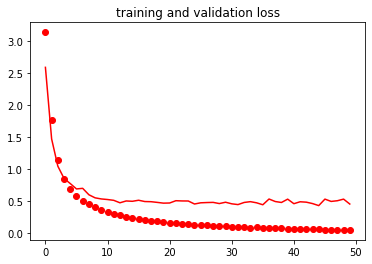

In [ ]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training and validation loss')

Text(0.5, 1.0, 'training and validation accuracy')

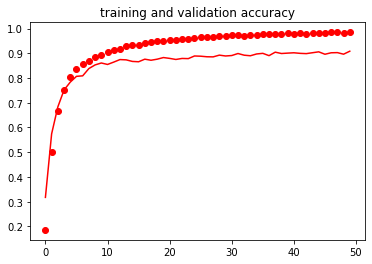

In [ ]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='training accuracy')
plt.plot(epochs,val_accuracy,'r',label='validation accuracy')
plt.title('training and validation accuracy')

In [ ]:
predicted_classes = cnn.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    